> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate The Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.


I have picked up The movie database. It contains 21 columns with 10,866 unique movies. We have got information from movie's metadata:
- Duration
- budget
- genre
- casts etc

And its performance
- ratings
- revenue
- profit (revenue - budget)

I'ld like to:
1. Get more insights on duration of movies in general. Trend between duration and rating
2. Does longer duration movie require more budget?
3. Does higher budget produce more profit? Does higher budget have better profit% too?
4. How have critics perceived movie, over the years?
5. Multiple-variable (2d) exploration: correlation of popularity and budget together on revenue


In [151]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [152]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
filename = 'tmdb-movies.csv'
tmdb_df = pd.read_csv(filename)

tmdb_df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [153]:
#tried describing the data, but couldn't make much sense of it

tmdb_df.describe

<bound method NDFrame.describe of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
5      281957  tt1663202    9.110700  135000000   532950503   
6       87101  tt1340138    8.654359  155000000   440603537   
7      286217  tt3659388    7.667400  108000000   595380321   
8      211672  tt2293640    7.404165   74000000  1156730962   
9      150540  tt2096673    6.326804  175000000   853708609   
10     206647  tt2379713    6.200282  245000000   880674609   
11      76757  tt1617661    6.189369  176000003   183987723   
12     264660  tt0470752    6.118847   15000000    36869414   
13     257344  tt2120120    5.984995   88000000   243637091   
14      99861  tt2395

In [154]:
#all movies

  

(10866, 21)

In [155]:
# popular movies
print(tmdb_df.query('vote_count>50').shape)
print(tmdb_df.query('vote_count>10').shape)

(4709, 21)
(10365, 21)


We can work with movies with > 10 votes since they are atleast marginally poopular. 
We'll have 10,365 such movies

In [156]:
#which rows have all columns of data. 
tmdb_df.dropna().shape
#Way too less. I don't intent to drop them all. For example: NaN homepage or tagline does not bother me.


(1992, 21)

__Understand duration:__ Its centrality and distribution attributes

count    10866.000000
mean       102.070863
std         31.381405
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

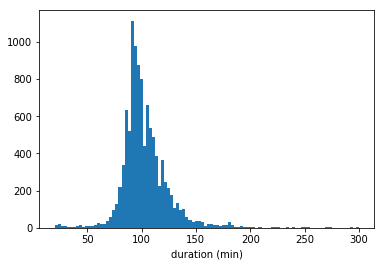

In [157]:

plt.xlabel('duration (min)')
plt.hist(tmdb_df['runtime'], range=(20,300), bins=100)

# mean time under 2 hours with very standard deviation of 31 mins
tmdb_df['runtime'].describe()

### Conclusion: 
    It's a positively skewed normal distribution

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning : Take preventive steps to filter problematic rows


In [158]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#Since I work with these numerical columns, I'll ensure no NaN
tmdb_df.dropna(subset=['budget_adj', 'revenue_adj', 'release_year', 'runtime'], inplace=True)

#Ensure that no movies are duplicate:
tmdb_df.drop_duplicates('id', keep = 'first', inplace=True)

#I dont want to work on empty movies, so will remove 0 length movies
tmdb_df.query('runtime > 0', inplace=True)



Cleanup movies with less than 10 votes (Not really data issue, but removing movies with small user footprint)

In [159]:
tmdb_df.query('vote_count>10', inplace=True)

In [160]:
# Remove movies with zero revenue or budget. A movie without revenue or budget doesn't look like released movie

tmdb_df.query('budget_adj > 0 and revenue_adj > 0', inplace=True)

Enrich dataframe with aggregate voting. It is needed for groupby claus on other columns

In [161]:
tmdb_df['vote_val'] = tmdb_df['vote_count'] * tmdb_df['vote_average']

In [162]:
#Check shape after these cleanups
print("shape ", tmdb_df.shape)

tmdb_df.head(2)

shape  (3822, 22)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_val
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,36153.0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,43913.5


### Distribution of Voting average across all movies

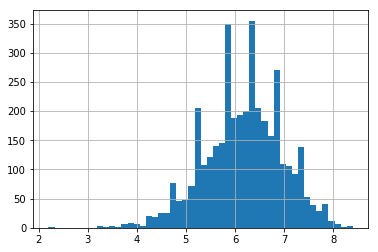

In [163]:
tmdb_df['vote_average'].hist(bins=50)

In [164]:
tmdb_df['vote_average'].describe()

count    3822.000000
mean        6.172109
std         0.792369
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

### Conclusion
Voting behavior, as expected, is _normally distributed_

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Trend between duration and rating

In [165]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

dur_vote = tmdb_df.groupby('runtime', as_index=False).sum()
print(dur_vote.shape)
dur_vote.head(10)


(138, 11)


,runtime,id,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_val
0,15,24914,0.208637,10,5,16,6.8,2003,1.185353e+01,5.926763e+00,108.8
1,26,14813,0.592219,3000000,21000000,89,7.4,1983,6.567936e+06,4.597555e+07,658.6
2,42,14301,0.352054,200000,3,140,7.7,2008,2.025573e+05,3.038360e+00,1078.0
3,62,80379,0.331313,250000,1000000,47,7.9,2011,2.423495e+05,9.693980e+05,371.3
4,63,51162,1.425344,30000000,14460000,174,6.8,2011,2.908194e+07,1.401750e+07,1183.2
5,66,27,1.117300,1000000,332323,53,5.2,2004,1.154445e+06,3.836488e+05,275.6
6,69,12144,1.101103,12300000,84460846,340,6.9,1988,2.267986e+07,1.557366e+08,2346.0
7,71,31225,0.142836,500000,3779620,27,7.6,1990,8.344493e+05,6.307802e+06,205.2
8,72,31563,2.460511,40000000,245542682,330,11.8,4005,4.795228e+07,2.940109e+08,1952.4
9,73,59387,0.225324,10000000,11411644,17,5.6,2002,1.212261e+07,1.383390e+07,95.2


### GroupBy issue:
Getting average vote after groupby on runtime is tricky.
Consider two movies:


| movie        | vote_count           | vote_average  |
| ------------- |:-------------:| -----:|
| 1      | 10 | 5.0 |
| 2      | 20      |   7.0 |

`tmdb_df.groupby('runtime').mean()['vote_average']`


would give __6__

but correct average should  be (5x10 + 7x20) / (10+20) = __6.3__

For this reason, I've included _vote_val_ column in Dataframe

In [166]:

print("Describe vote_average\n",(dur_vote['vote_val'] / dur_vote['vote_count']).describe())
print("Describe duration\n", dur_vote['runtime'].describe())

Describe vote_average
 count    138.000000
mean       6.831296
std        0.552644
min        5.200000
25%        6.394195
50%        6.820483
75%        7.200000
max        8.100000
dtype: float64
Describe duration
 count    138.000000
mean     134.224638
std       47.485537
min       15.000000
25%       98.250000
50%      132.500000
75%      166.750000
max      338.000000
Name: runtime, dtype: float64


### Create a plot to see the pattern between duration in X and average vote in Y

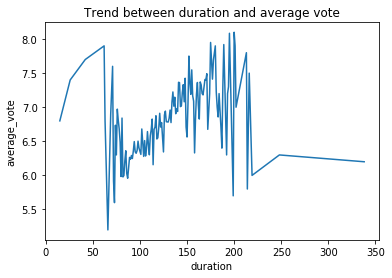

In [167]:
plt.title("Trend between duration and average vote")
plt.xlabel("duration")
plt.ylabel("average_vote")
plt.plot(dur_vote['runtime'], dur_vote['vote_val'] / dur_vote['vote_count'])

In [168]:
#Pearson's correlation

def correlation(x, y):
    xbar = (x - x.mean()) / x.std(ddof=0)
    ybar = (y - y.mean()) / y.std(ddof=0)
    return (xbar * ybar).mean()

#I also need to standardize for profit later on
def standardize(series):
    return (series - series.min()) / series.std()


In [169]:
print("Runtime to rating correlation: {}".format(correlation(dur_vote['runtime'], dur_vote['vote_val'] / dur_vote['vote_count'])))

Runtime to rating correlation: 0.3476115872104202


### Conclusion
Duration of the movie has a weak correlation to its rating. People like good movies, not specifically long or short ones!

### Research Question 2: Does longer duration movie require more budget?

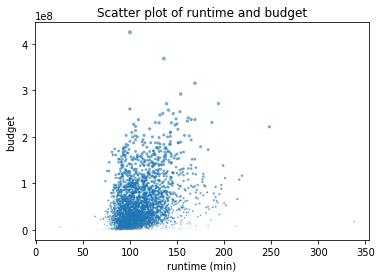

In [170]:
#Does budget linearly increase with movie length?

grouped_df = tmdb_df.groupby(['runtime', 'budget_adj'], as_index=False).mean()

size = grouped_df['budget_adj'] / grouped_df['budget_adj'].std()
plt.title("Scatter plot of runtime and budget")
plt.xlabel('runtime (min)')
plt.ylabel('budget ')
plt.scatter(grouped_df.runtime, grouped_df.budget_adj, alpha=0.5, s=size)
plt.show()


In [171]:
print("Runtime to Budget correlation: {}".format(correlation(grouped_df['runtime'], grouped_df['budget_adj'])))


Runtime to Budget correlation: 0.3332347129996555


### Conclusion
Weak positive correlation between runtime and budget as visible in scatter plot too.

### Research Question 3: 
#### a. Does higher revenue need higher budget?
#### b. Does higher budget produce more profit? 

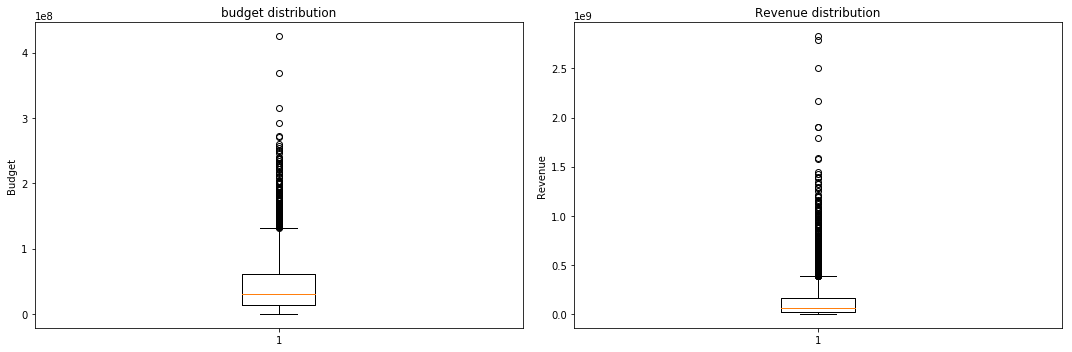

Budget
 count    3.822000e+03
mean     4.448624e+07
std      4.489627e+07
min      9.693980e-01
25%      1.326685e+07
50%      3.029664e+07
75%      6.077832e+07
max      4.250000e+08
Name: budget_adj, dtype: float64


Revenue
 count    3.822000e+03
mean     1.380846e+08
std      2.167159e+08
min      2.370705e+00
25%      1.877042e+07
50%      6.241213e+07
75%      1.648848e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64


In [172]:
# Answer 3A: Let's explore budget and revenue

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
left, right = axes.flatten()

left.boxplot(tmdb_df['budget_adj'])
left.set_title('budget distribution')
left.set_ylabel('Budget')

right.boxplot(tmdb_df['revenue_adj'])
right.set_title('Revenue distribution')
right.set_ylabel('Revenue')

fig.tight_layout()
plt.show()

print("Budget\n", tmdb_df['budget_adj'].describe())
print("\n\nRevenue\n", tmdb_df['revenue_adj'].describe())

### Let's see correlation between budget and revenue.
Hunch is that higher budget movie generally make higher revenue. There will always be exceptions though!

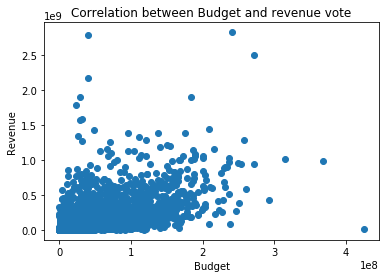

In [173]:
plt.title("Correlation between Budget and revenue vote")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.scatter(tmdb_df['budget_adj'], tmdb_df['revenue_adj'])

We see a strong positive correlation between budget and revenue

### Quantify Correlation between Budget and Revenue

In [174]:
print('Correlation between revenue and budget={}'.format(correlation(tmdb_df['budget_adj'], tmdb_df['revenue_adj'])))


Correlation between revenue and budget=0.5692818976110817


### Answer 3b: Does higher budget also return higher profit?

#### Let's first see Overall profit across movie industry

In [175]:
#Let's first see if industry as a whole is profit making or not.

total_revenue = tmdb_df['revenue_adj'].sum()
total_budget = tmdb_df['budget_adj'].sum()
profit_ratio = (total_revenue - total_budget)*100 / total_budget
print("Overall profit {}%".format(profit_ratio.round(2)))

Overall profit 210.4%


describe profit
 count    3.822000e+03
mean     9.359839e+07
std      1.946883e+08
min     -4.139124e+08
25%     -1.423599e+06
50%      2.804140e+07
75%      1.082487e+08
max      2.750137e+09
Name: profit, dtype: float64


Budget to profit correlation= 0.4030861966538418


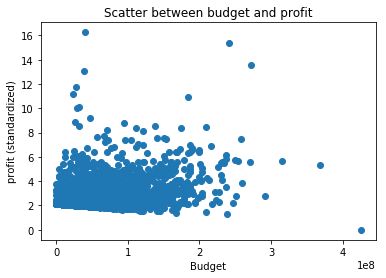

In [176]:

#Creating profit col on original dataframe
tmdb_df['profit'] = tmdb_df['revenue_adj'] - tmdb_df['budget_adj']
print("describe profit\n", tmdb_df['profit'].describe())

plt.title("Scatter between budget and profit")
plt.xlabel("Budget")
plt.ylabel("profit (standardized)")
plt.scatter(tmdb_df['budget_adj'], standardize(tmdb_df['profit']))

#Quantify Budget to profit correlation
print("\n\nBudget to profit correlation=", correlation(tmdb_df['budget_adj'], tmdb_df['profit']))


### Conclusion
profit is positively correlated to Budget

### Research Question 4 : How have critics perceived movie, over the years?

Average Ratings of movies year on year

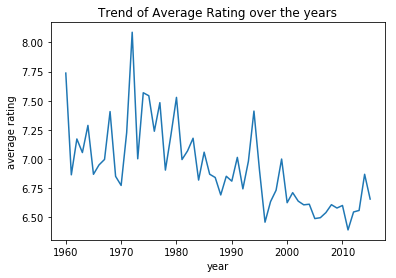

In [177]:
year_rating = tmdb_df.groupby('release_year', as_index=False).sum()

plt.title("Trend of Average Rating over the years")
plt.xlabel('year')
plt.ylabel('average rating')
plt.plot(year_rating['release_year'], year_rating['vote_val'] / year_rating['vote_count'])


### Conclusion
#### Movies have received lower rating with time
#### There is a negative correlation.
#### Critics have been particular harsh after year 2000

In [178]:
#Confirming the negative correlation visible

print("Correlation {}".format(correlation(year_rating['release_year'], year_rating['vote_val'] / year_rating['vote_count'])))

Correlation -0.6722629127503332


### Research Question 5 : Correlation of popularity and budget together on revenue

We'll proxy popularity with vote_count

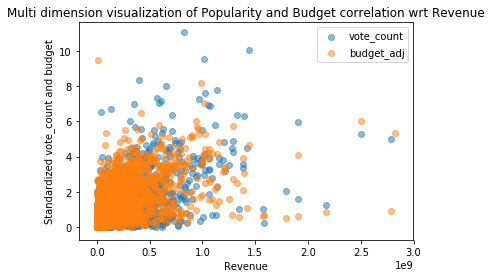

In [179]:
plt.title("Multi dimension visualization of Popularity and Budget correlation wrt Revenue")
plt.xlabel("Revenue")
plt.ylabel("Standardized vote_count and budget")
plt.scatter(tmdb_df['revenue_adj'], standardize(tmdb_df['vote_count']), alpha=0.5)
plt.scatter(tmdb_df['revenue_adj'], standardize(tmdb_df['budget_adj']), alpha=0.5)
plt.legend(loc='upper right')
plt.show()

In [180]:
print("Revenue to Popularity", correlation(tmdb_df['revenue_adj'], standardize(tmdb_df['vote_count'])))
print("Revenue to budget", correlation(tmdb_df['revenue_adj'], standardize(tmdb_df['budget_adj'])))

Revenue to Popularity 0.6537570015480298
Revenue to budget 0.569281897611085


<a id='conclusions'></a>
## Conclusions

Overall data:
- 95% of movies have duration between 41 minutes and 2 hr 23 min
- 95% of movies have rating between 4.2 and 7.8.
- Voting follows normal distribution pattern.


1) Duration and average rating:
- weak correlation of 0.26. People like good movies, not specifically long or short ones!


2) Duration and budget:
- Weak correlation of 0.16. Limitation: Based on the graph, budget was sprayed across all duration, so wasn't able to extract much of it.

3) Budget to profit:

* Movie has generally been profit making industry. With industry average of 209% profit
* High budget fetches high revenue. High Correlation of 0.57
* High budget also has positive correlation to higher profit: 0.4 (Looks like causation, but it's not controlled experiment, hence cannot confirm)
* Budget doesn't have correlation to profit percentage however. Infact it shows a weak -0.01 correlation


4) Rating year on year
* Movies have received lower rating with time (-ve correlatin of -0.6)
* Critics have been particular harsh after year 2000

5) correlation of popularity and budget together on revenue
* Higher revenue movies are definitely popular. correlation= 0.65 . It's almost causation- popularity leads to revenue
* Higher revenue doesn't come free of cost- It's correlated to high budget. correlation = 0.57

I need to ofcourse understand that I've found all these correlations, but they are not causation. If all other variables leading to success of movie was controlled, we could've commented on cause too.